# ClusterProfiler_Gene_set_enrichment_analysis_GSEA

## import libraries

In [1]:
#import libraries
suppressMessages({
    library("clusterProfiler")
    library("enrichplot")
    library("ggplot2")
    library("org.Mm.eg.db", character.only = TRUE)
    library(dplyr)
})

In [2]:
# SET THE DESIRED ORGANISM HERE
organism = "org.Mm.eg.db"
#BiocManager::install(organism, character.only = TRUE)
library(organism, character.only = TRUE)

In [3]:
setwd("/home/nhk/Desktop/")

df = read.csv("ClusterProfiler_GO_GSEA.csv")
df = distinct(df, Gene_name, .keep_all = TRUE)

head(df,2)

,Gene_name,log2FoldChange
,<chr>,<dbl>
1,0610009B22Rik,-0.5951621
2,0610010K14Rik,-0.7797498


In [4]:
# we want the log2 fold change 
original_gene_list <- df$log2FoldChange

# name the vector
names(original_gene_list) <- df$Gene_name

# omit any NA values 
gene_list<-na.omit(original_gene_list)

# sort the list in decreasing order (required for clusterProfiler)
gene_list = sort(gene_list, decreasing = TRUE)

In [5]:
head(gene_list,2)

Scd4    Itgax 
5.925422 3.739924

In [6]:
gse <- clusterProfiler::gseGO(geneList=gene_list,
                              ont ="BP", #change to "CC" (cellular component) or "MF" (molecular function)
                              keyType = "SYMBOL", 
                              minGSSize = 10, 
                              maxGSSize = 500, 
                              pvalueCutoff = 0.05, 
                              verbose = TRUE, 
                              OrgDb = organism, 
                              pAdjustMethod = "BH", 
                              nPermSimple = 10000)

preparing geneSet collections...

GSEA analysis...

Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...



In [33]:
head(gse,2)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0000904,GO:0000904,cell morphogenesis involved in differentiation,404,0.3952338,2.531181,1e-10,6.02029e-09,3.601831e-09,2477,"tags=58%, list=35%, signal=40%",Adcy1/Map2/Megf9/Map3k13/Peak1/Trpc5/Bmpr2/Camk2a/Lmtk2/Met/Nptx1/Mef2a/Epha4/Itgav/Ppp1r9a/Atrn/Sema5a/Plxna4/Dcc/Unc5c/Nedd4/Atp2b2/Shank1/Gli3/Col25a1/Bmpr1b/Unc5d/Crkl/Abl2/Tbc1d24/Abi2/Efnb2/Sema6d/Ntn1/Dag1/Ablim1/Slc1a3/Arhgap35/Tmem106b/Efna5/Ptch1/Plxnc1/Nrp2/Fndc3b/Nr4a3/Cdk5r1/Prkca/Shank3/Adarb1/Kif5a/Skil/Btbd3/Zfp365/Atrnl1/Plxna1/Opa1/Tanc2/Alcam/Epb41l5/Sema3a/Shank2/Prex2/B4galt5/Rere/Rapgef2/Celsr2/Flrt2/Map3k1/Cntn2/Kif1a/Unc5b/Heg1/Stxbp1/Fat3/Trak2/Ptpn11/Syngap1/Map1a/Rbfox2/Srcin1/Actr2/Auts2/D130043K22Rik/Dpysl2/Lzts1/Snap91/Adam10/Reln/Parva/Kalrn/Fzd7/Sema3d/Camk2b/Chrna7/Ptprz1/Sipa1l3/Robo1/Dnm3/Chl1/Tiam1/Atp7a/Itga4/Cdkl5/Lrp4/Sema3c/Hecw2/Tnik/Zswim6/Esrrb/Itgb3/App/Ep300/Pip5k1c/Akap5/Vps33a/Fmn1/Nlgn1/Mapk9/Clic4/Robo2/Bbs1/Cdh1/Mapk8ip3/Lats2/Fzd4/Prex1/Slitrk4/Tnr/Sema3e/L1cam/Slc9a6/Kif13b/Clasp2/Pdlim5/Tbr1/Pten/Xk/Crk/Antxr1/Arc/Lats1/Apc/Chrnb2/Ss18l1/Plxna2/Myh10/Sipa1l1/Dpysl5/Syne1/Enah/Dclk1/Nfasc/Cdh4/Il1rapl1/Rock2/Lims1/Nlgn3/Picalm/Cobl/Brsk2/Arhgef26/Ripor2/Pafah1b1/Dixdc1/Caprin1/Wnt5a/Als2/Lgr4/Gdnf/Braf/Ppfia2/Kndc1/Trak1/Slitrk1/Nrcam/St6gal1/Cdh11/Ust/Arhgap44/Mink1/Ctnnd2/Kidins220/Coro1c/Cdh2/Kif5c/Nedd9/Apbb2/Src/Neo1/Cask/Ptprf/Lzts3/Nr2e1/Usp9x/Ctnnb1/Cux2/Zic2/Spg20/Grin1/Prox1/Zswim5/Zeb2/Aatk/Ulk1/Creb1/Ank3/Notch1/Zdhhc15/Dscam/Slitrk5/Xlr3b/Ppp3ca/Plxnd1/Dst/Ulk2/Stxbp5/Frmd6/Lrp6/Megf8/Sema7a/Eif4g2/Hecw1/Mapk8ip2/Usp33/Rgma/Ngfr/Etv1/Fat1/Tal1/Pard3/Dnm1l/Lamc1/Nectin1/Vldlr/Parvb
GO:0006364,GO:0006364,rRNA processing,73,-0.4471553,-3.601011,1e-10,6.02029e-09,3.601831e-09,3097,"tags=90%, list=44%, signal=51%",Mterf4/Fbll1/Exosc3/Mrps11/Rbfa/Sirt7/Fbl/Rpl11/Rpl7a/Rps8/Rpf1/Rps14/Rpl27/Heatr1/Wdr46/Prkdc/Frg1/Exosc8/Mrm3/Exosc4/Pih1d2/Rpp40/Rpp38/Nop10/Pih1d1/Wdr55/Ngdn/Pop7/Exosc5/Rps17/Gtf2h5/Rps15/Rpl26/Rps24/Emg1/Dkc1/Exosc7/Rps16/Nhp2/Ddx18/Mphosph6/Mrto4/Rps19/Nol8/Rpl35/Trmt112/Riok1/Helq/Rps21/Gar1/Rpf2/Pop5/Nsa2/Tsr3/Fcf1/Lyar/Rps28/Rpl35a/Lsm6/Mettl5/Rrp15/Exosc6/Pin4/Npm3/Isg20/Esf1


## ridgeplot

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Picking joint bandwidth of 0.146



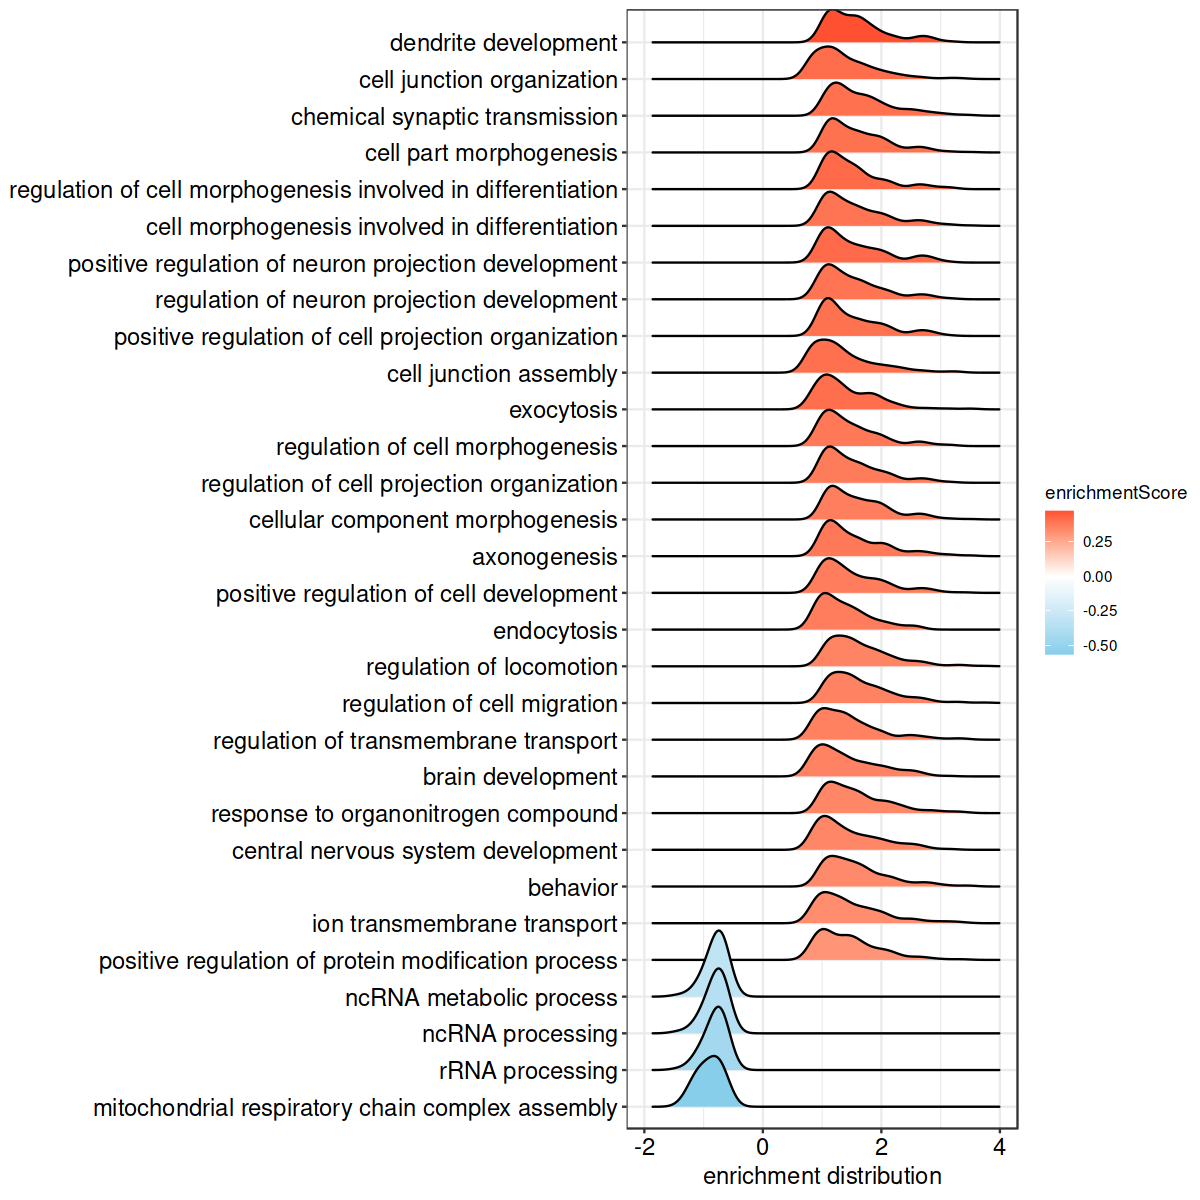

In [31]:
#To change the size of the plots in jupyter notebook
options(repr.plot.width=10, repr.plot.height=10)

require(viridis)

ridgeplot(gse, fill = "enrichmentScore",
          showCategory=30, core_enrichment = TRUE,  
          label_format = 30) + 
labs(x = "enrichment distribution") +
scale_fill_gradient2(low = "skyblue", high = "red")+
scale_x_continuous(limits = c(-2, 4))

In [38]:
pdf("GSEA_ridgeplot_BP.pdf", wi=10, h=10)

par(mfrow = c(1,1))
par(mar = c(4.5,4.5,2.5,1))

require(viridis)

ridgeplot(gse, fill = "enrichmentScore",
          showCategory=30, core_enrichment = TRUE,  
          label_format = 30) + 
labs(x = "enrichment distribution") +
scale_fill_gradient2(low = "skyblue", high = "red")+
scale_x_continuous(limits = c(-2, 4))

dev.off()

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Picking joint bandwidth of 0.111



png 
  2